In [80]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))

In [81]:
%matplotlib inline

from session.sessions import selected_009266
from imports import *
from scipy import stats
from loading import load_session_data
from target import get_spike_counts
np.set_printoptions(suppress=True)

In [82]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Session data

In [83]:
selected_009266

['009266_hippoSIT_2023-04-17_17-04-17',
 '009266_hippoSIT_2023-04-18_10-10-37',
 '009266_hippoSIT_2023-04-18_17-03-10',
 '009266_hippoSIT_2023-04-19_10-33-51',
 '009266_hippoSIT_2023-04-24_16-56-55',
 '009266_hippoSIT_2023-05-02_12-22-14',
 '009266_hippoSIT_2023-04-20_08-57-39',
 '009266_hippoSIT_2023-04-26_08-20-17',
 '009266_hippoSIT_2023-05-04_19-47-15',
 '009266_hippoSIT_2023-04-20_15-24-14',
 '009266_hippoSIT_2023-04-21_08-43-00',
 '009266_hippoSIT_2023-04-21_13-12-31',
 '009266_hippoSIT_2023-04-24_10-08-11',
 '009266_hippoSIT_2023-05-04_09-11-06',
 '009266_hippoSIT_2023-05-22_09-27-22',
 '009266_hippoSIT_2023-05-23_09-18-05',
 '009266_hippoSIT_2023-05-25_15-55-57',
 '009266_hippoSIT_2023-06-14_08-21-23',
 '009266_hippoSIT_2023-06-19_08-58-35']

In [84]:
session = selected_009266[10]

session_data = load_session_data(session)

tl = session_data['tl']
trials = session_data['trials']
cfg = session_data['cfg']
areas = session_data['areas']
aeps = session_data['aeps']
aeps_events = session_data['aeps_events']
AEP_metrics_lims = session_data['AEP_metrics_lims']
AEP_metrics_raw = session_data['AEP_metrics_raw']
AEP_metrics_norm = session_data['AEP_metrics_norm']
tgt_matrix = session_data['tgt_matrix']
single_units = session_data['single_units']
spike_times = session_data['spike_times']
unit_names = session_data['unit_names']
animal = session_data['animal']
aeps_file = session_data['aeps_file']
h5_file = session_data['h5_file']
report_path = session_data['report_path']
session

'009266_hippoSIT_2023-04-21_08-43-00'

In [85]:
area = 'A1'
idxs_succ       = np.where(tgt_matrix[:, 4] == 1)[0]
idxs_miss       = np.where(tgt_matrix[:, 4] == 0)[0]

aeps_bgr_mean   = aeps[area][aeps_events[:, 1] == 1].mean(axis=0)
aeps_first_succ = aeps[area][tgt_matrix[idxs_succ][:, 2]].mean(axis=0)
aeps_first_miss = aeps[area][tgt_matrix[idxs_miss][:, 2]].mean(axis=0)

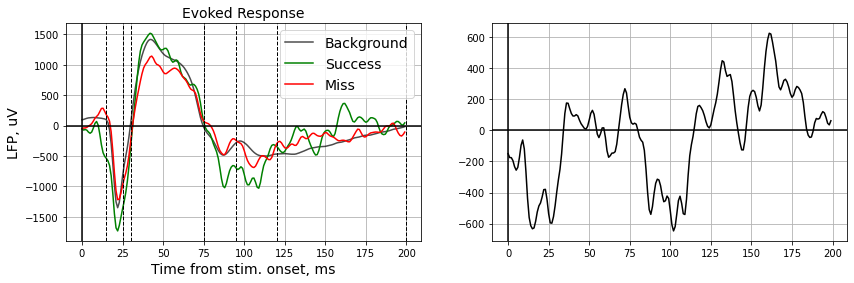

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].plot(aeps_bgr_mean, color='black', label='Background', alpha=0.7)
axes[0].plot(aeps_first_succ, color='green', label='Success')
axes[0].plot(aeps_first_miss, color='red', label='Miss')
axes[0].axhline(0, color='black')
axes[0].axvline(0, color='black')
axes[0].legend(loc='upper right', prop={'size': 14})
axes[0].set_xlabel('Time from stim. onset, ms', fontsize=14)
axes[0].set_ylabel('LFP, uV', fontsize=14)
axes[0].set_title('Evoked Response', fontsize=14)
#axes[0].set_ylim(-1200, 1200)
axes[0].grid()
for i, (key, value) in enumerate(AEP_metrics_lims[area].items()):
    axes[0].axvline(value[0], color='black', ls='--', lw=1)
    axes[0].axvline(value[1], color='black', ls='--', lw=1)

# MMR strength
axes[1].plot(aeps_first_succ - aeps_bgr_mean, color='black')
axes[1].axhline(0, color='black')
axes[1].axvline(0, color='black')
#axes[1].set_ylim(-1200, 1200)
#axes[1].axvspan(90, 130, alpha=0.2, color='black')
axes[1].grid()